# Grover's Algorithm - Normal without Walkers

First step is to install qiskit :)

In [ ]:
import sys
!{sys.executable} -m pip install qiskit
!{sys.executable} -m pip install qiskit-aer

# Grover's Algorithm Steps

1. Initialize the Quantum State
   - Apply a Hadamard transform to all qubits to create an equal superposition over all possible states (this represents an equal probability of the system being in any one of the $N = 2^n$ possible states).
   - The state after this step is $$
    ∣ψ⟩ = -{1 \over \sqrt{N}} \sum_{x=0}^{N-1} \ket x $$


2. Oracle Query
   -   if the state is $\ket{x_0}$, the oracle applies the transformation: $$
\mathcal{O} \, f \, |x\rangle = \begin{cases} 
 -|x\rangle & \text{if } x = x_0 \\
|x\rangle & \text{otherwise}
\end{cases} $$
  

3. Grover Diffusion Operator (Amplitude Amplification)
   -   This is the key step that amplifies the amplitude of the correct solution. After the oracle marks the correct state, the diffusion operator increases the probability amplitude of that marked state while reducing the amplitudes of the others. This operation is also called the inversion about the mean.
   -   Mathematically, it reflects all amplitudes about their average value.
  
4. Repeat Oracle and Diffusion Steps:
   - These two steps (oracle and diffusion) are repeated $ \mathcal{O}(\sqrt{N})$ times to sufficiently amplify the probability of the correct state, so that when the system is measured, the correct state is found with high probability.

5. Measure the Quantum State:
   -   After repeating the oracle and diffusion steps the appropriate number of times, measure the state of the qubits. With high probability, the measurement will give the correct solution $ x_{0}$.


## Example

For sake of simplicity, this example will only have 2 qubits

We will try to search the element $\ket{11}$ in this example

For this, we can use a CZ (Controlled Z) gate. This gate only flips the phase whenever the "input" is $\ket{11}$, thus making it the oracle for this test case

## Implementation

Imports

In [24]:
from qiskit import *
from qiskit_aer import *
from qiskit.visualization import plot_histogram

Defining the Auxiliary Circuit. This is only a circuit to define the Oracle.
Like said above, the oracle will only consist of the CZ gate, since it only flips the phase on the $\ket{11}$ state. Therefore, this circuit will only consist of this gate.
In essence, this is how to create a new gate, not necessarily the oracle.

This is not required, it's only to show how to create a new gate

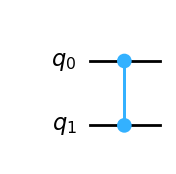

In [3]:
#define the oracle circuit
oracle = QuantumCircuit(2, name='oracle')
oracle.cz(0,1)
oracle.to_gate()
oracle.draw(output="mpl")

Creating the main Circuit


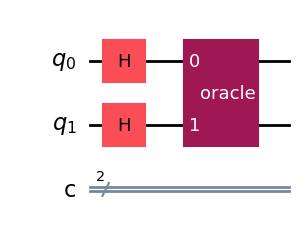

In [26]:
circuit = QuantumCircuit(2,2)
circuit.h([0,1])
circuit.append(oracle, [0,1]) #add the created gate (circuit) to the main circuit and applying it to the qubits
circuit.draw(output="mpl")

Now let's do the 3rd step, which amplifies the desired state probability

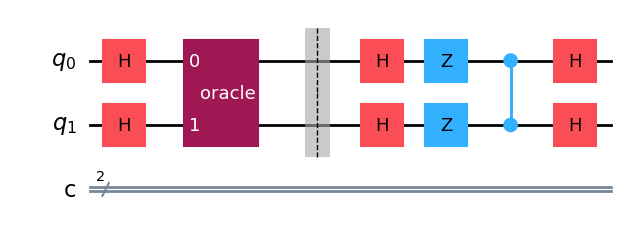

In [27]:
circuit.barrier()
circuit.h([0,1])
circuit.z([0,1])
circuit.cz(0,1)
circuit.h([0,1])

circuit.draw(output="mpl")

For a 2 qubit state, 1 iteration in enough to get the right state. However, we need to do more iterations depending on the number of quibits.
As such, we can now measure the qubits.

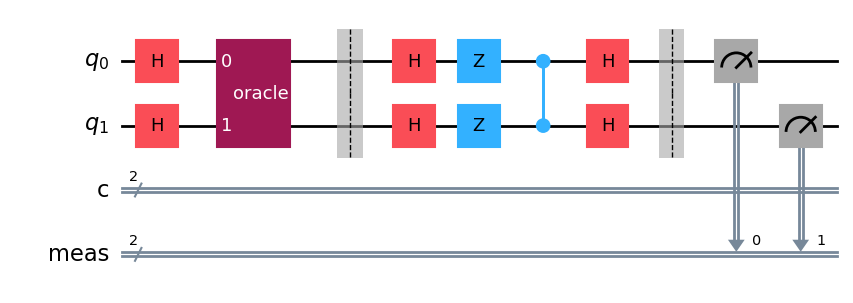

In [28]:
circuit.measure_all()
circuit.draw(output="mpl")

Now we can run this in a simulator

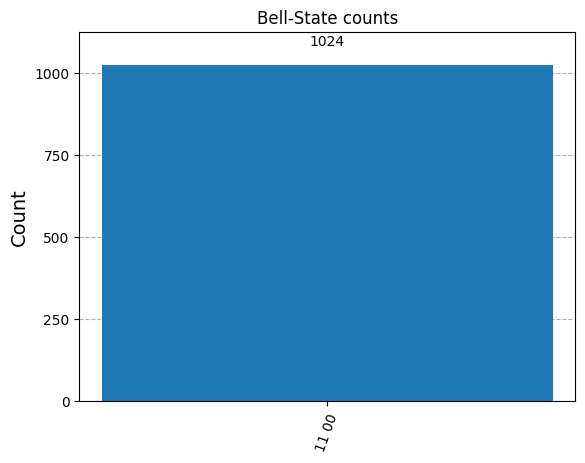

In [29]:
# Transpile for simulator
simulator = AerSimulator()
circ = transpile(circuit, simulator)

# Run and get counts
result = simulator.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Bell-State counts')